In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = 'peppers_BlueHills.png'
image = Image.open(image_path)

Download the peppers image from this link https://blogs.mathworks.com/images/loren/173/peppers_BlueHills.png. Return a binary image (only 0s and 1s), with 1s corresponding to only the yellow peppers. Do this by setting a minimum and maximum threshold value on pixel values in the R,G,B channels. Note that you won’t be able to perfectly

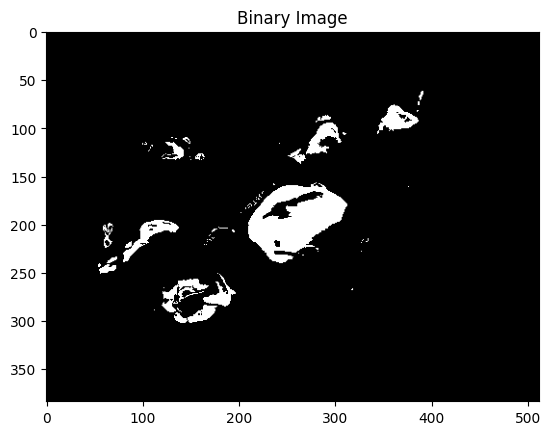

In [8]:
img_array = np.array(image)
yellow_min = np.array([150, 150, 0], np.uint8)
yellow_max = np.array([255, 255, 85], np.uint8)

# mask
mask = np.all(((img_array >= yellow_min) & (img_array <= yellow_max)), axis=2)

binary_image = mask.astype(np.uint8)

plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.show()


While RGB is the most common color space for images, it is not the only one. For example, one popular color space is HSV (Hue-Saturation-Value). Hue encodes color, value encodes lightness/darkness, and saturation encodes the intensity of the color. For a visual, see Fig. 1 of this wiki article https://en.wikipedia.org/wiki/HSL_and_HSV. Convert the image to the HSV color space using OpenCV’s cvtColor() function, and try to perform the same task by setting a threshold in the Hue channel. Add both binary images to your report. Which colorspace was easier to work with for this task, and why?

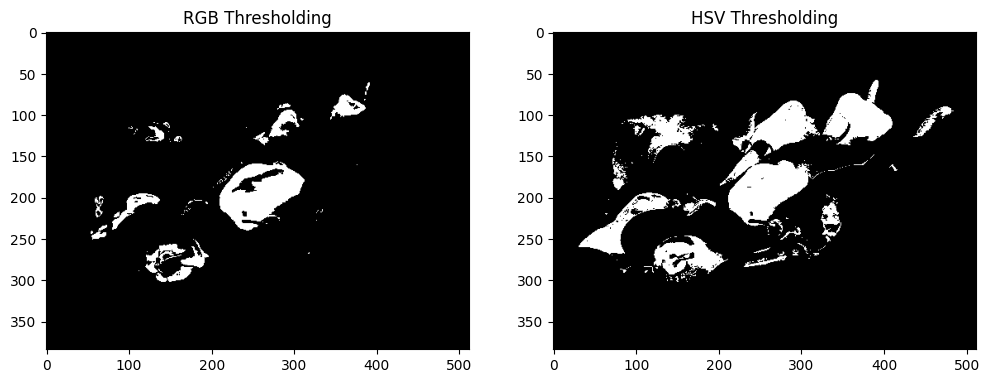

In [11]:
import cv2

img_hsv = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)

# HSV thresholds for yellow
hsv_yellow_min = np.array([20, 100, 100], np.uint8)
hsv_yellow_max = np.array([30, 255, 255], np.uint8)

# Mask
hsv_mask = cv2.inRange(img_hsv, hsv_yellow_min, hsv_yellow_max)
hsv_binary_image = hsv_mask // 255

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title("RGB Thresholding")

ax[1].imshow(hsv_binary_image, cmap='gray')
ax[1].set_title("HSV Thresholding")
plt.show()


*What are the degrees of freedom for each of the 2D geometric transformations? Explain what each degree of freedom is*

R:  represent the independent parameters that can be controlled

*A square is located on the XY plane where the top left of the square is at (200,50). The size of the square is 50x50. Hence your square corners have the coordinates top left (200,50), top right (250,50), bottom left (200,0), bottom right (250,0). You want to reflect the square about the line y=x. Derive the transformation matrix. Hint: Decouple the reflection into similarity (rotation + scale) and translations*

*Write functions to produce transformation matrices.*


Write separate functions that output the 3 x 3 transformation matrices for the following
transforms: translation, rotation, similarity (translation, rotation, and scale), and affine. The
functions should take as input the following arguments

- Translation: horizontal and vertical displacements
- Rotation: angle
- Similarity: angle, horizontal/vertical displacements, and scale factor (assume equal scaling for horizontal and vertical dimensions)
- Affine: 6 parameters
- The output of each function will be a 3 x 3 matrix.

## Translation: horizontal and vertical displacements

In [16]:
import numpy as np

def translation_matrix(horizontal_displacement, vertical_displacement):
    T = np.array([[1, 0, horizontal_displacement],
                  [0, 1, vertical_displacement],
                  [0, 0, 1]])
    return T

translation = translation_matrix(10, 20)
translation


array([[ 1,  0, 10],
       [ 0,  1, 20],
       [ 0,  0,  1]])

## Rotation: angle

In [17]:
def rotation_matrix(angle):
    theta = np.radians(angle)
    R = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])
    return R

rotation = rotation_matrix(45)
rotation

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

## Similarity

In [18]:

def similarity_matrix(angle, horizontal_displacement, vertical_displacement, scale_factor):
    # Combine translation, rotation and scaling into one matrix
    S = scale_factor * rotation_matrix(angle)
    S[0, 2] = horizontal_displacement
    S[1, 2] = vertical_displacement
    return S

similarity = similarity_matrix(30, 5, 5, 2)
similarity


array([[ 1.73205081, -1.        ,  5.        ],
       [ 1.        ,  1.73205081,  5.        ],
       [ 0.        ,  0.        ,  2.        ]])

# Affine: 6 parameters

In [20]:
def affine_matrix(a, b, c, d, e, f):
    A = np.array([[a, b, c],
                  [d, e, f],
                  [0, 0, 1]])
    return A

affine = affine_matrix(1, 0, 10, 0, 1, 20) 
affine

array([[ 1,  0, 10],
       [ 0,  1, 20],
       [ 0,  0,  1]])